<a href="https://colab.research.google.com/github/lalalauren809/laurenpatton/blob/main/sentiment_sample_lauren_patton_archsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Objective:

> Comparative Analysis: To generally compare sentiment across different sections of the 3rd installment of the Harry Potter book series to highlight thematic elements, tonal shifts, or differences in narrative style. This comparative analysis should deepen understanding of the book's structure and themes.







In [9]:
#install pdf extractor
!pip install PyPDF2

In [10]:
#basic libraries
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
import string
import pandas as pd
import nltk

In [ ]:
# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

#2. Data Extraction

In [12]:
#extract file(s) from drive using PyPDF2 library
import PyPDF2

def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, "rb") as file:
            reader = PyPDF2.PdfReader(file)
            for page_num in range(len(reader.pages)):
                text += reader.pages[page_num].extract_text()
    except Exception as e:
        print("Error occurred while extracting text:", e)
    return text

# Print the text for review:
pdf_file_path = "/content/drive/MyDrive/lauren_patton_sentiment_sample/Harry Potter - Book 3 - The Prisoner of Azkaban.pdf"

extracted_text = extract_text_from_pdf(pdf_file_path)
#print(extracted_text)

#3. Data Exploration (Collection)



> After obtaining access to the dataset I will seek to obtain a better understanding of the types of text documents. This will help inform the text preprocessing stage and will help identify potential challenges such as noise, missing data and inconsistent formatting.


> For this example, I am working with a single pdf file and can expect to encounter typical text cleaning challenges around removing metadata, headers, footers, page numbers and other non-textual (special characters) content that may not be relevant for analysis.



> In the real world we might have many different file types and can expect to create visualizations that help the client weed out irrelevant files and information we dont want to use downstream.





In [ ]:
"""
#iterate through file directory
def visualize_file_types(file_paths):
    file_types = {}
    for file_path in file_paths:
        file_ext = os.path.splitext(file_path)[1]
        file_types[file_ext] = file_types.get(file_ext, 0) + 1

    # Plotting file types
    plt.figure(figsize=(8, 6))
    plt.bar(file_types.keys(), file_types.values(), color='skyblue')
    plt.xlabel('File Types')
    plt.ylabel('Count')
    plt.title('Count of Different File Types')
    plt.show()

# Visualize file types (in this case well just use our file path from previous code block)
visualize_file_types(pdf_file_path)
"""

"\n#iterate through file directory\ndef visualize_file_types(file_paths):\n    file_types = {}\n    for file_path in file_paths:\n        file_ext = os.path.splitext(file_path)[1]\n        file_types[file_ext] = file_types.get(file_ext, 0) + 1\n\n    # Plotting file types \n    plt.figure(figsize=(8, 6))\n    plt.bar(file_types.keys(), file_types.values(), color='skyblue')\n    plt.xlabel('File Types')\n    plt.ylabel('Count')\n    plt.title('Count of Different File Types')\n    plt.show()\n\n# Visualize file types (in this case well just use our file path from previous code block)\nvisualize_file_types(pdf_file_path)\n\n"

# 4. Data Structuring



> Splitting the text data into smaller chunks allows for a more granular analysis compared to analyzing the entire corpus as a single unit. This granularity facilitates comparison between different sections or pages of the document. This comparison can reveal patterns, trends, or shifts in sentiment across different parts of the document, providing deeper insights into the underlying sentiment dynamics.






In [ ]:
def split_text_into_pages_df(text, max_words_per_page=300):
    pages = []
    words = text.split()
    current_page = ''
    word_count = 0

    for word in words:
        # Add the word to the current page
        current_page += word + ' '
        word_count += 1

        # Check if the word count exceeds the maximum words per page
        if word_count >= max_words_per_page:
            pages.append(current_page.strip())
            current_page = ''
            word_count = 0

    # Append any remaining text as the last page
    if current_page:
        pages.append(current_page.strip())

    # Create DataFrame
    df = pd.DataFrame({'page_text': pages})
    return df

# Split text into pages with a maximum of 270 words per page
page_df = split_text_into_pages_df(extracted_text, max_words_per_page=270)

# View the DataFrame
page_df.head()


,page_text
0,1CHAPTER ONE OWL POSTHarry Potter was a highly...
1,"dipped his quill into it, and began to write,p..."
2,the frontgarden to admire Uncle Vernon's new c...
3,"small eyes swiveled around to Harry, who was r..."
4,"snores of his enormous cousin, Dudley. It must..."


#5. Data Preprocessing

> I will perform text preprocessing steps such as removing punctuation, stopwords, special characters and normalizing the text. Additionally I might handle any specific requirements or domain-specific preprocessing steps.



###5a. Cleaning Functions

In [ ]:
from nltk.corpus import stopwords

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Tokenize the text in order to remove stop words
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Remove numbers and punctuation
    filtered_tokens = [word for word in filtered_tokens if word.isalpha()]
    # Concatenate tokens back into a single string
    text = ' '.join(filtered_tokens)
    return text.strip()

def clean_pages_in_df(df):
    cleaned_pages = [clean_text(page) for page in df['page_text']]
    clean_df = pd.DataFrame({'Cleaned_text': cleaned_pages})
    return clean_df

# page_df is the DataFrame obtained from split_text_into_pages_df function
clean_df = clean_pages_in_df(page_df)

# View the cleaned DataFrame
print(clean_df.head())

                                        Cleaned_text
0  one owl postharry potter highly unusual boy ma...
1  dipped quill began write pausing every listen ...
2  frontgarden admire uncle vernon new company ca...
3  small eyes swiveled around harry rooted spot h...
4  snores enormous cousin dudley must late harry ...


###5b. Tokenize the Text



> If a sentiment analysis task requires analyzing sentiment at the word or token level, then tokenization would be necessary. However, I am only interested in analyzing sentiment at the document or page level so we will only be tokenizing for EDA purposes.


In [ ]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

def tokenize_pages_in_df(df):
    df['Tokens'] = df['Cleaned_text'].apply(tokenize_text)
    return df

# Assuming clean_df is the DataFrame obtained from clean_pages_in_df function
tokenized_df = tokenize_pages_in_df(clean_df)

# View the tokenized DataFrame
tokenized_df.head()

,Cleaned_text,Tokens
0,one owl postharry potter highly unusual boy ma...,"[one, owl, postharry, potter, highly, unusual,..."
1,dipped quill began write pausing every listen ...,"[dipped, quill, began, write, pausing, every, ..."
2,frontgarden admire uncle vernon new company ca...,"[frontgarden, admire, uncle, vernon, new, comp..."
3,small eyes swiveled around harry rooted spot h...,"[small, eyes, swiveled, around, harry, rooted,..."
4,snores enormous cousin dudley must late harry ...,"[snores, enormous, cousin, dudley, must, late,..."


#6. Exploratory Data Analysis



> Since sentiment analysis alone may not capture the full context in which sentiments are expressed. Identifying recurring themes or topics can assist in understanding the underlying reasons or contexts behind specific sentiments. For example, a sentiment analysis may reveal that a particular page is associated with a negative sentiment, but identifying the recurring topic in that page provides insight into the specific person, thing or idea that is associated with that sentiment.



> Additionally insights gained from recurring themes or topics can be used to improve sentiment analysis models. By incorporating topic-specific features or context-aware sentiment analysis techniques, models can achieve higher accuracy and robustness in sentiment prediction



###6a. Frequency Distribution


> Upon initial examination, it is evident that the most frequently occurring words consist predominently of character names, as well as, common "stop words". To refine our analysis, adjustments to the stop word removal list are warranted. However, when addressing the prominence of character names, several considerations must be taken into account before their removal:





> > **Removal of Character Names:** Should the primary character names overwhelm the word frequency distribution chart, potentially eclipsing other pertinent terms, I will consider removal to facilitate our analysis. This aims to ensure that the sentiment analysis model effectively captures broader thematic and tonal transitions within the narrative, rather than being unduly influenced by character references.





> > **Consideration of Context:** Prior to potentially removing character names, contextual nuances merit thorough consideration. If character interactions, relationships, or narrative developments significantly contribute to tonal shifts and thematic richness, omitting character names may inadvertently obscure vital narrative elements. In such instances, a nuanced adjustment to the sentiment analysis methodology or exploration of alternative strategies for character name handling may be warranted.









First few tokens: ['one', 'owl', 'postharry', 'potter', 'highly', 'unusual', 'boy', 'many', 'ways', 'one']


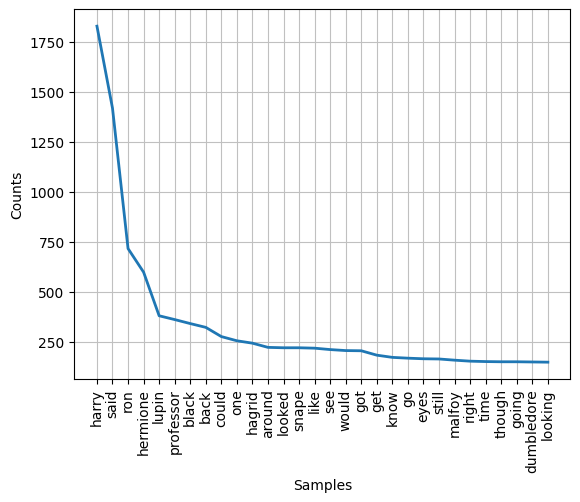

In [ ]:
from nltk.probability import FreqDist

def generate_freq_distribution(tokens):
    # Print first few tokens to verify
    print("First few tokens:", tokens[:10])
    fdist = FreqDist(tokens)
    fdist.plot(30, cumulative=False)
    plt.show()

# Assuming tokenized_df is the DataFrame with tokenized text
# Concatenate all tokens into a single list for frequency distribution
all_tokens = [token for sublist in tokenized_df['Tokens'] for token in sublist]

# Generate and display frequency distribution
generate_freq_distribution(all_tokens)

###6b. Document Length Distribution



> Analyzing document length in sentiment analysis helps in understanding tonal shifts and narrative structure. This analysis also aids in selecting appropriate model architectures and preprocessing strategies, such as determining optimal sequence lengths and data segmentation techniques, crucial for accurate sentiment analysis.


> My initial observation is the length of each document. Analyzing sentiment in very long documents can pose several challenges:

>> Longer documents may contain diverse topics and sentiments, making it harder to capture the overall sentiment accurately. Also, processing long documents can be computationally expensive and may require specialized architectures or techniques to handle efficiently.

>> Longer documents may introduce noise or irrelevant information, leading to reduced model performance.

>  Therefore, I will need to be mindful of this during preprocessing and model selection. I will attempt to execute selected models at the page level, but I suspect I will need to split the text into smaller chunks due to the type of text I am working with.








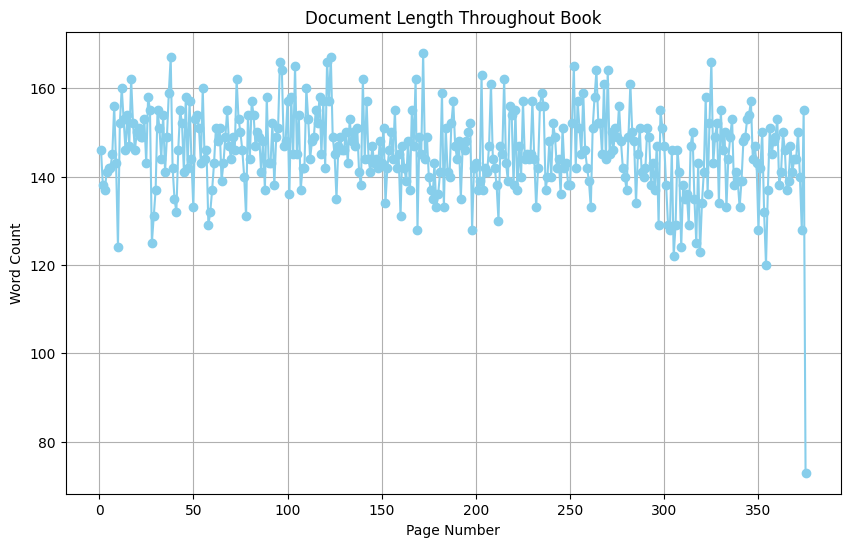

In [ ]:
# Assuming clean_df is the DataFrame obtained from clean_pages_in_df function
# Calculate word count for each page
clean_df['word_count'] = clean_df['Cleaned_text'].apply(lambda x: len(word_tokenize(x)))

# Plotting page length over time
plt.figure(figsize=(10, 6))
plt.plot(clean_df.index + 1, clean_df['word_count'], marker='o', color='skyblue', linestyle='-')
plt.title('Document Length Throughout Book')
plt.xlabel('Page Number')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

#7. Sentiment Analysis



> In choosing a sentiment analysis model for analyzing tonal shifts over time within our text corpus I will be using pre-trained models such as TextBlob and BERT. This is primarily due to the fact that I do not have labeled data.



> I will evaluate models based on their suitability for the book's language and themes, and explore capabilities such as fine-grained sentiment analysis and aspect-based sentiment analysis.


> We will then assess model performance qualitatively by applying them to pages of the book's text and visually comparing sentiment predictions.







###7a. TextBlob

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity and subjectivity of a page
def calculate_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity

    # Categorize sentiment into words indicating positive, negative, or neutral sentiments
    if sentiment_polarity > 0:
        sentiment_label = 'positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    return sentiment_polarity, sentiment_subjectivity, sentiment_label

# Assuming clean_df is the DataFrame containing the cleaned text
clean_df['Sentiment_Polarity'], clean_df['Sentiment_Subjectivity'], clean_df['Sentiment_Label'] = zip(*clean_df['Cleaned_text'].apply(calculate_sentiment))


# View the DataFrame with sentiment polarity for each page
#clean_df.head(10)

##7b. BERT

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.eval()  # Set the model to evaluation mode

# Function to calculate sentiment polarity using BERT
def calculate_sentiment_bert(text):
    # Tokenize input text
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors='pt')

    # Forward pass through BERT model
    outputs = model(**inputs)

    # Apply softmax to get probabilities
    probabilities = softmax(outputs.logits, dim=1)

    # Get predicted sentiment label
    sentiment_label = 'positive' if torch.argmax(probabilities) == 1 else 'negative'

    # Get sentiment polarity score (you can also use probabilities[0][0] or probabilities[0][1])
    sentiment_polarity = probabilities[0][1].item() - probabilities[0][0].item()

    return sentiment_polarity, sentiment_label

# Calculate sentiment using BERT
clean_df['Sentiment_Polarity_BERT'], clean_df['Sentiment_Label_BERT'] = zip(*clean_df['Cleaned_text'].apply(calculate_sentiment_bert))

# View the final sentiment comparison DataFrame
clean_df.head(10)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,Cleaned_text,Tokens,word_count,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Label,Sentiment_Polarity_BERT,Sentiment_Label_BERT
0,one owl postharry potter highly unusual boy ma...,"[one, owl, postharry, potter, highly, unusual,...",146,0.040805,0.566585,positive,0.092142,positive
1,dipped quill began write pausing every listen ...,"[dipped, quill, began, write, pausing, every, ...",138,0.053571,0.541071,positive,0.046096,positive
2,frontgarden admire uncle vernon new company ca...,"[frontgarden, admire, uncle, vernon, new, comp...",137,0.060490,0.463170,positive,0.058469,positive
3,small eyes swiveled around harry rooted spot h...,"[small, eyes, swiveled, around, harry, rooted,...",141,-0.106250,0.482292,negative,0.114329,positive
4,snores enormous cousin dudley must late harry ...,"[snores, enormous, cousin, dudley, must, late,...",142,0.060405,0.481143,positive,0.129003,positive
5,glasses bright green forehead clearlyvisible h...,"[glasses, bright, green, forehead, clearlyvisi...",142,0.049868,0.433069,positive,0.093323,positive
6,unconscious landed soft flump onharry bed midd...,"[unconscious, landed, soft, flump, onharry, be...",145,0.092717,0.373669,positive,0.005450,positive
7,read ministry magic employee scoops grand priz...,"[read, ministry, magic, employee, scoops, gran...",156,0.203499,0.568989,positive,0.046344,positive
8,mutantskeletons muggles broken grown extra hea...,"[mutantskeletons, muggles, broken, grown, extr...",143,0.087689,0.270076,positive,0.097229,positive
9,reflecting luminous hands hisclock looked happ...,"[reflecting, luminous, hands, hisclock, looked...",124,0.333459,0.486383,positive,0.104358,positive


#8. Comparing Sentiment Scores



> Correlating sentiment polarity data with key plot events, character developments, or thematic elements can help reveal the relationship between narrative content and emotional impact. Analyzing how sentiment polarity aligns with important plot points can reveal patterns in tonal shifts and narrative style. Lets compare the document (page) sentiment scores for each model.






In [ ]:
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.5 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=c31bad48038d3bd6f34dd4572ba87a1ee2df642c530d8b162e500ea6cc9e4d6f
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


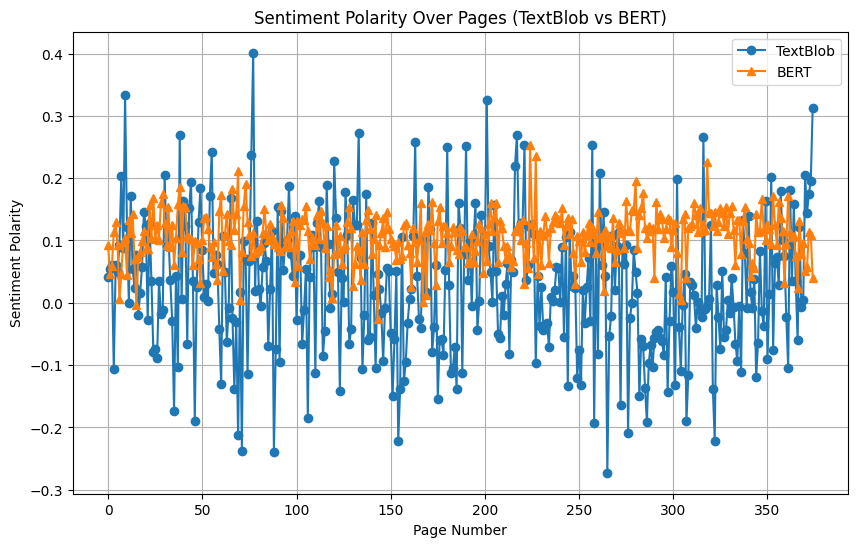

In [ ]:
import mplcursors

# Plotting sentiment polarity over rows for TextBlob and BERT
plt.figure(figsize=(10, 6))
plt.plot(clean_df.index, clean_df['Sentiment_Polarity'], marker='o', linestyle='-', label='TextBlob')
plt.plot(clean_df.index, clean_df['Sentiment_Polarity_BERT'], marker='^', linestyle='-', label='BERT')
plt.title('Sentiment Polarity Over Pages (TextBlob vs BERT)')
plt.xlabel('Page Number')
plt.ylabel('Sentiment Polarity')
plt.legend()  # Show legend to differentiate TextBlob and BERT
plt.grid(True)

# Add hover functionality to the plot to see specific pages
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Row: {clean_df.index[sel.target.index]}, TextBlob Polarity: {sentiment_comparison_df['Sentiment_Polarity_TextBlob'].iloc[sel.target.index]}, BERT Polarity: {sentiment_comparison_df['Sentiment_Polarity_BERT'].iloc[sel.target.index]}"
))

plt.show()


# Initial Observations



> Upon initial inspection, it becomes apparent that both sentiment analysis models yield scores predominantly situated around the neutral sentiment threshold. Despite minor discrepancies in polarity scores between the models, there exists a notable discrepancy in the absolute sentiment predictions. This discrepancy prompts an exploration into potential factors contributing to this observation, particularly in the absence of labeled data.

> Challenges and Proposed Solutions

> 1. Model Limitations:

> Sentiment analysis models can often encounter difficulties in handling nuances such as sarcasm, irony, context-dependent and sentiment. One proposed solution I could employ involves tailoring pre-trained sentiment analysis models using literature-specific datasets to meticulously capture the subtleties prevalent in fictional texts.



> 2. Data Characteristics:

> Fictional texts are characterized by intricate narratives, multi-dimensional characters, and ambiguous scenarios, presenting challenges for sentiment analysis models. A proposed solution for this could include employing feature engineering techniques to extract sophisticated narrative elements, character dynamics, and thematic nuances.






> 3. Domain Specific Challenges:


> Sentiment analysis models face challenges in comprehending the emotional depth, character evolution, and thematic complexities inherent in literary works. Proposed solutions include implementing preprocessing methodologies customized for literary texts, such as dialogue parsing, named entity recognition, and sentiment lexicon refinement, can enhance model performance.



> 4. Lengthy Text Documents

> Longer text documents may be a challenge due to their complexity and diverse themes, potentially resulting in lower accuracy. To address this, we could break down the text from pages into sentences and analyze each sentence individually to obtain more accurate sentiment scores then aggregate the sentiment scores of sentences to derive a sentiment score for each page, offering a more concise summary of sentiment for the entire document.







#Export Results

> I willl export the tokenized text along with sentiment scores for further visualization




In [ ]:
# Specify the file path where you want to save the CSV file
#csv_file_path = "/content/drive/MyDrive/hp_books/hp_book_3_output.csv"
#clean_df .to_csv(csv_file_path, index=False)